In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('C:/Users/moacy/Desktop/Projetos VSCODE/netflix_titles/netflix_titles.csv', sep = ',')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Resumo técnico dos dados
print("\nInformações sobre o DataFrame:")
print(df.info())

# Quantidade de valores nulos por coluna
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Contagem de valores nulos por coluna:
|              | 0    |
|:-------------|:-----|
| show_id      | 0    |
| type         | 0    |
| title        | 0    |
| director     | 2634 |
| cast         | 825  |
| countr

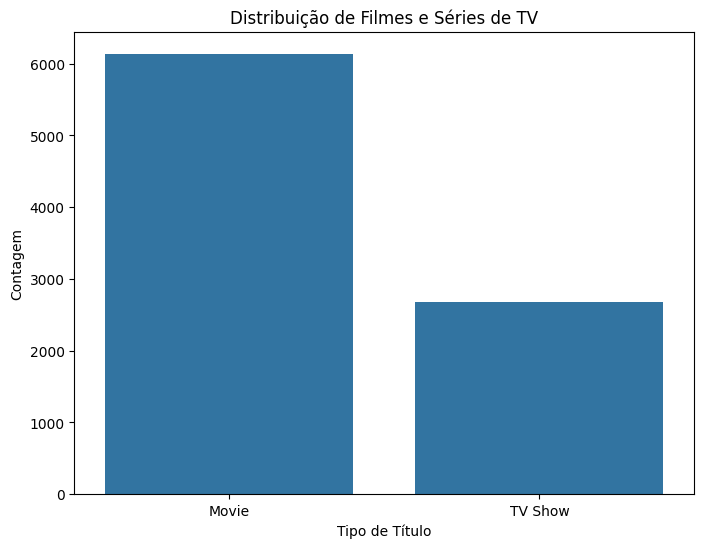

In [4]:
# Gráfico 1: Contagem de Filmes vs. Séries
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribuição de Filmes e Séries de TV')
plt.xlabel('Tipo de Título')
plt.ylabel('Contagem')
plt.show()

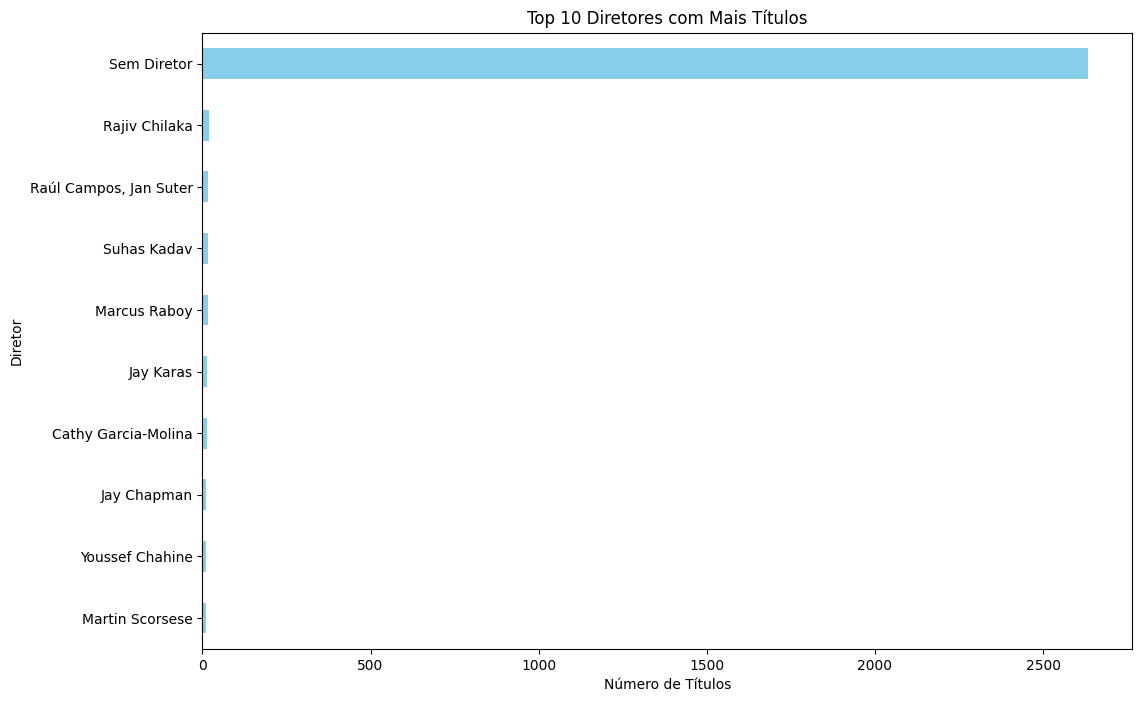

In [5]:
# Gráfico 2: Top 10 Diretores (tratando os valores nulos)
plt.figure(figsize=(12, 8))
df['director'].fillna('Sem Diretor').value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Diretores com Mais Títulos')
plt.xlabel('Número de Títulos')
plt.ylabel('Diretor')
plt.gca().invert_yaxis()
plt.show()

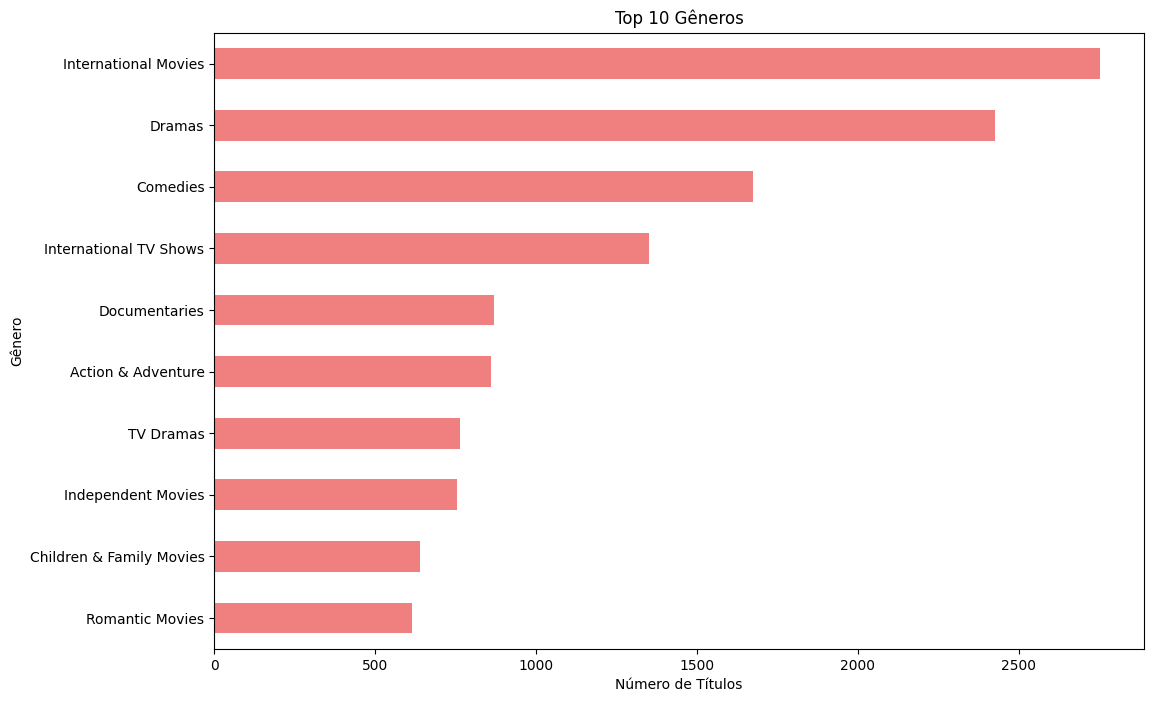

In [6]:
# Gráfico 3: Top 10 Gêneros
plt.figure(figsize=(12, 8))
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
genres.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Gêneros')
plt.xlabel('Número de Títulos')
plt.ylabel('Gênero')
plt.gca().invert_yaxis()
plt.show()

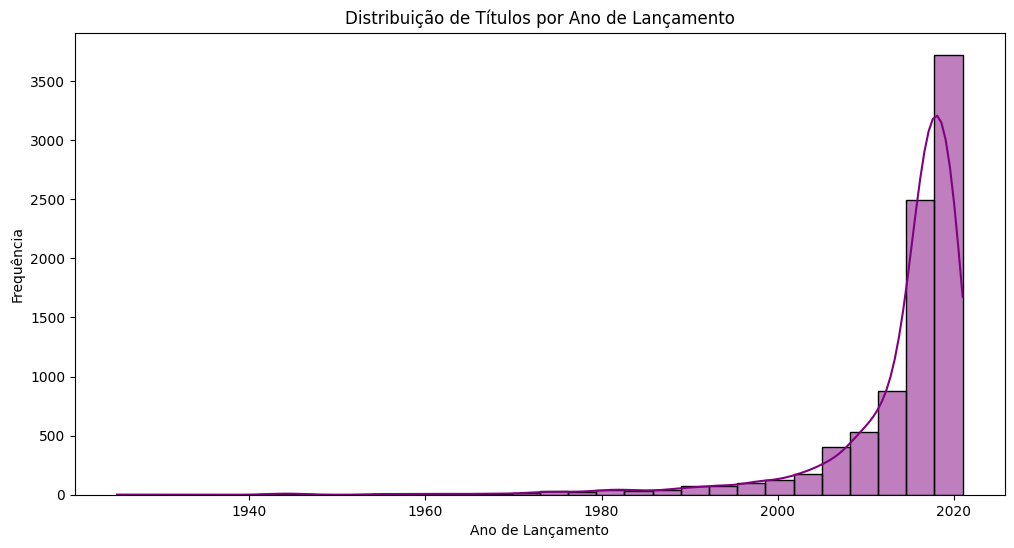

In [7]:
# Gráfico 4: Distribuição de Anos de Lançamento
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribuição de Títulos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.show()

In [8]:
# Preencher os valores nulos com uma string vazia
features = ['director', 'cast', 'listed_in', 'description']
for feature in features:
    df[feature] = df[feature].fillna('')

In [9]:
# Criar coluna 'tags'
def create_tags(row):
   return ' '.join(row[features]).lower()

df['tags'] = df.apply(create_tags, axis=1)

In [10]:
# Visualizar a coluna 'tags'
print("Primeiras 5 linhas do DataFrame com a nova coluna 'tags':")
print(df[['title', 'tags']].head().to_markdown(index=False, numalign="left", stralign="left"))

Primeiras 5 linhas do DataFrame com a nova coluna 'tags':
| title                 | tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|:----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# Inicializar e aplicar o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [12]:
# Gerar a matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags'])

In [13]:
# Inspecionar o resultado
print("Formato da matriz TF-IDF:")
print(tfidf_matrix.shape)

Formato da matriz TF-IDF:
(8807, 5000)


In [14]:
# Vetorização do texto com TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags'])

In [15]:
# Cálculo da Similaridade do Cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
# Mapeamento de Títulos para Índices
indices = pd.Series(df.index, index=df['title'])

In [17]:
# Criação da Função de Recomendação
def get_recommendations(title, cosine_sim_matrix=cosine_sim, df=df, indices=indices):
    if title not in indices:
        return f"O filme '{title}' não foi encontrado na base de dados."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [ ]:
# Teste
print("Recomendações para 'The Garden of Words':")
print(get_recommendations('The Garden of Words').to_markdown(numalign="left", stralign="left"))

Recomendações para 'The Garden of Words':
|      | title                                   |
|:-----|:----------------------------------------|
| 3239 | Girls und Panzer der Film               |
| 219  | EDENS ZERO                              |
| 428  | Words Bubble Up Like Soda Pop           |
| 3137 | Girls und Panzer                        |
| 3773 | A Silent Voice                          |
| 2175 | Nagi-Asu: A Lull in the Sea             |
| 3098 | Fireworks                               |
| 4742 | The Could’ve-Gone-All-the-Way Committee |
| 2598 | DRIFTING DRAGONS                        |
| 5476 | BLAME!                                  |


In [ ]:

filme_base = "The Garden of Words"

recs = get_recommendations(filme_base).tolist()

recs = recs[:10]

recs_concatenadas = " | ".join(recs)

# Cria o DataFrame final
df_final = pd.DataFrame({
    "Filme": [filme_base],
    "Recomendações": [recs_concatenadas]
})

print(df_final.to_markdown(index=False))

# Exporta para CSV
df_final.to_excel("recomendacoes10.xlsx", index=False)

| Filme               | Recomendações                                                                                                                                                                                                              |
|:--------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| The Garden of Words | Girls und Panzer der Film | EDENS ZERO | Words Bubble Up Like Soda Pop | Girls und Panzer | A Silent Voice | Nagi-Asu: A Lull in the Sea | Fireworks | The Could’ve-Gone-All-the-Way Committee | DRIFTING DRAGONS | BLAME! |
